#Digit reconizer

Credits - https://www.tensorflow.org/tutorials/quickstart/beginner

In [31]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


In [32]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [42]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.2968 - accuracy: 0.9133 - val_loss: 0.1421 - val_accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.1071 - accuracy: 0.9677 - val_loss: 0.0914 - val_accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 2s 900us/step - loss: 0.0872 - accuracy: 0.9729 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.0756 - accuracy: 0.9764 - val_loss: 0.0765 - val_accuracy: 0.9768


In [43]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Prediction: 0
Actual: 0


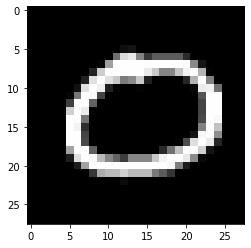

In [44]:
i = 69
print(f"Prediction: {probability_model(np.reshape(x_test[i], (1, 28, 28))).numpy().argmax(axis=1)[0]}")
print(f"Actual: {y_test[i]}")
plt.imshow(x_test[i], cmap='gray')
plt.show()

In [45]:
probability_model.save('model.h5')